in progress

In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from typing import TypeVar, Tuple

In [172]:
TEST_DATASET_PATH = 'test.csv'
TRAIN_DATASET_PATH = 'train.csv'

X_final = pd.read_csv(TEST_DATASET_PATH)
X = pd.read_csv(TRAIN_DATASET_PATH)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [173]:
X.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


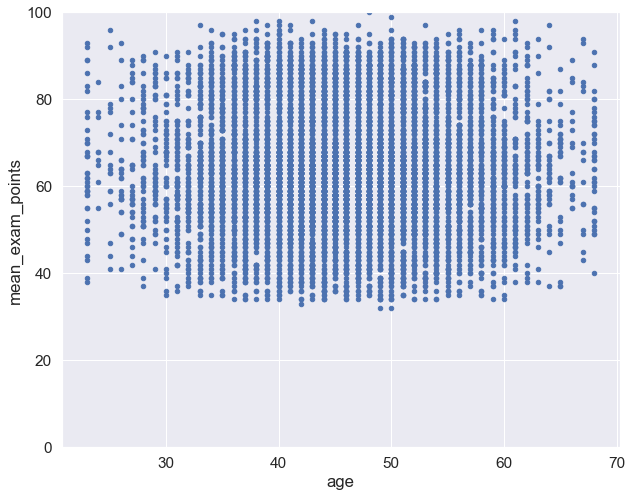

In [174]:
var = 'age'
data = pd.concat([X['mean_exam_points'], X[var]], axis=1)
data.plot.scatter(x=var, y='mean_exam_points', ylim=(0,100), figsize=(10, 8));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


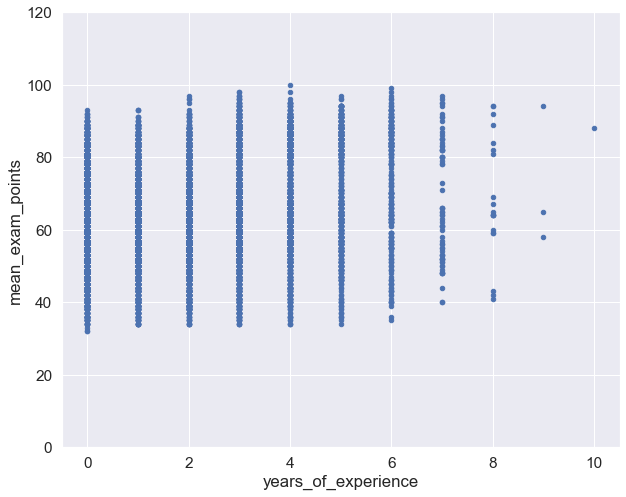

In [175]:
var = 'years_of_experience'
data = pd.concat([X['mean_exam_points'], X[var]], axis=1)
data.plot.scatter(x=var, y='mean_exam_points', ylim=(0,120), figsize=(10, 8));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


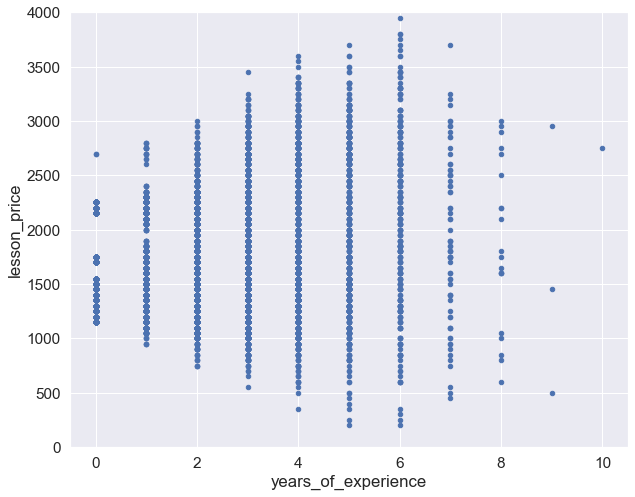

In [176]:
var = 'years_of_experience'
data = pd.concat([X['lesson_price'], X[var]], axis=1)
data.plot.scatter(x=var, y='lesson_price', ylim=(0,4000), figsize=(10, 8));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


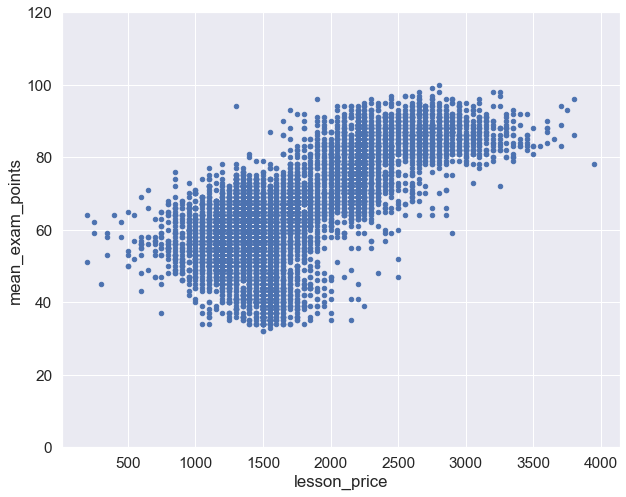

In [177]:
var = 'lesson_price'
data = pd.concat([X['mean_exam_points'], X[var]], axis=1)
data.plot.scatter(x=var, y='mean_exam_points', ylim=(0,120), figsize=(10, 8));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


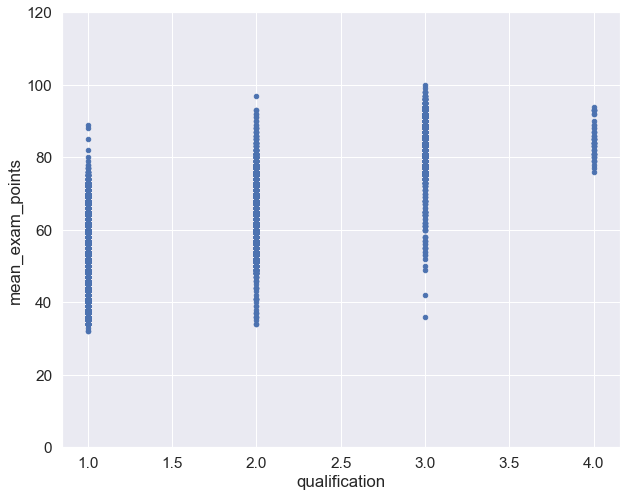

In [178]:
var = 'qualification'
data = pd.concat([X['mean_exam_points'], X[var]], axis=1)
data.plot.scatter(x=var, y='mean_exam_points', ylim=(0,120), figsize=(10, 8));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


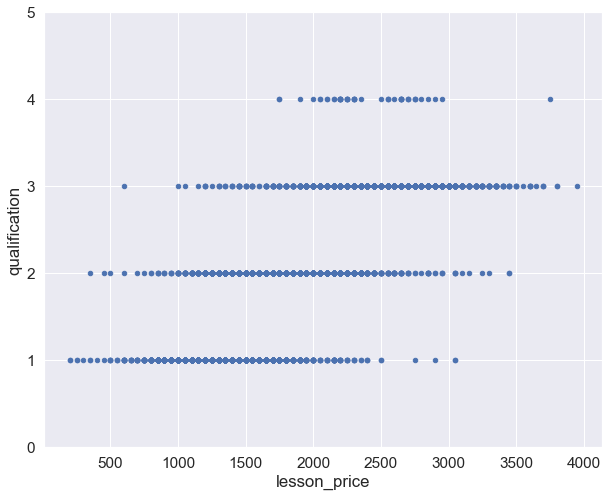

In [179]:
var = 'lesson_price'
data = pd.concat([X['qualification'], X[var]], axis=1)
data.plot.scatter(x=var, y='qualification', ylim=(0,5), figsize=(10, 8));

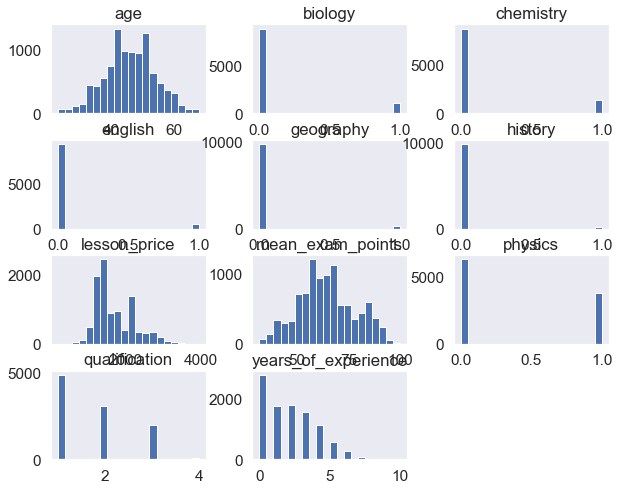

In [180]:
# отбираем количественные признаки
df_num_features = X.select_dtypes(include='float64')

num_features = pd.DataFrame(df_num_features)

num_features.hist(figsize=(10, 8), bins=20, grid=False);

In [181]:
TARGET_NAME = 'mean_exam_points'
BASE_FEATURE_NAMES = X.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = X.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

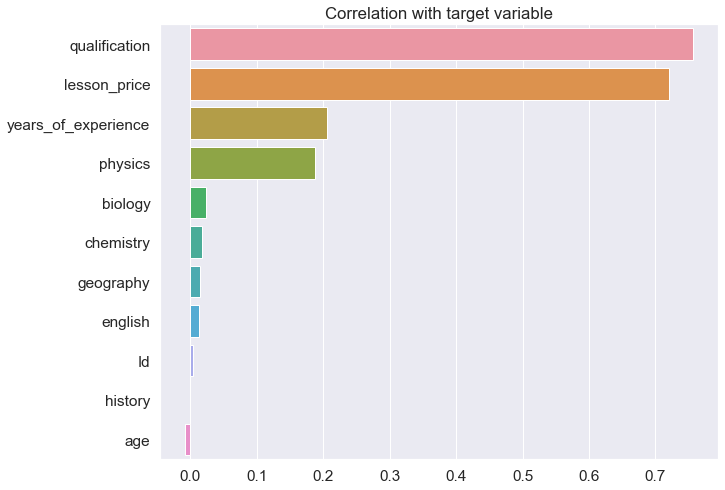

In [182]:
corr_with_target = X[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

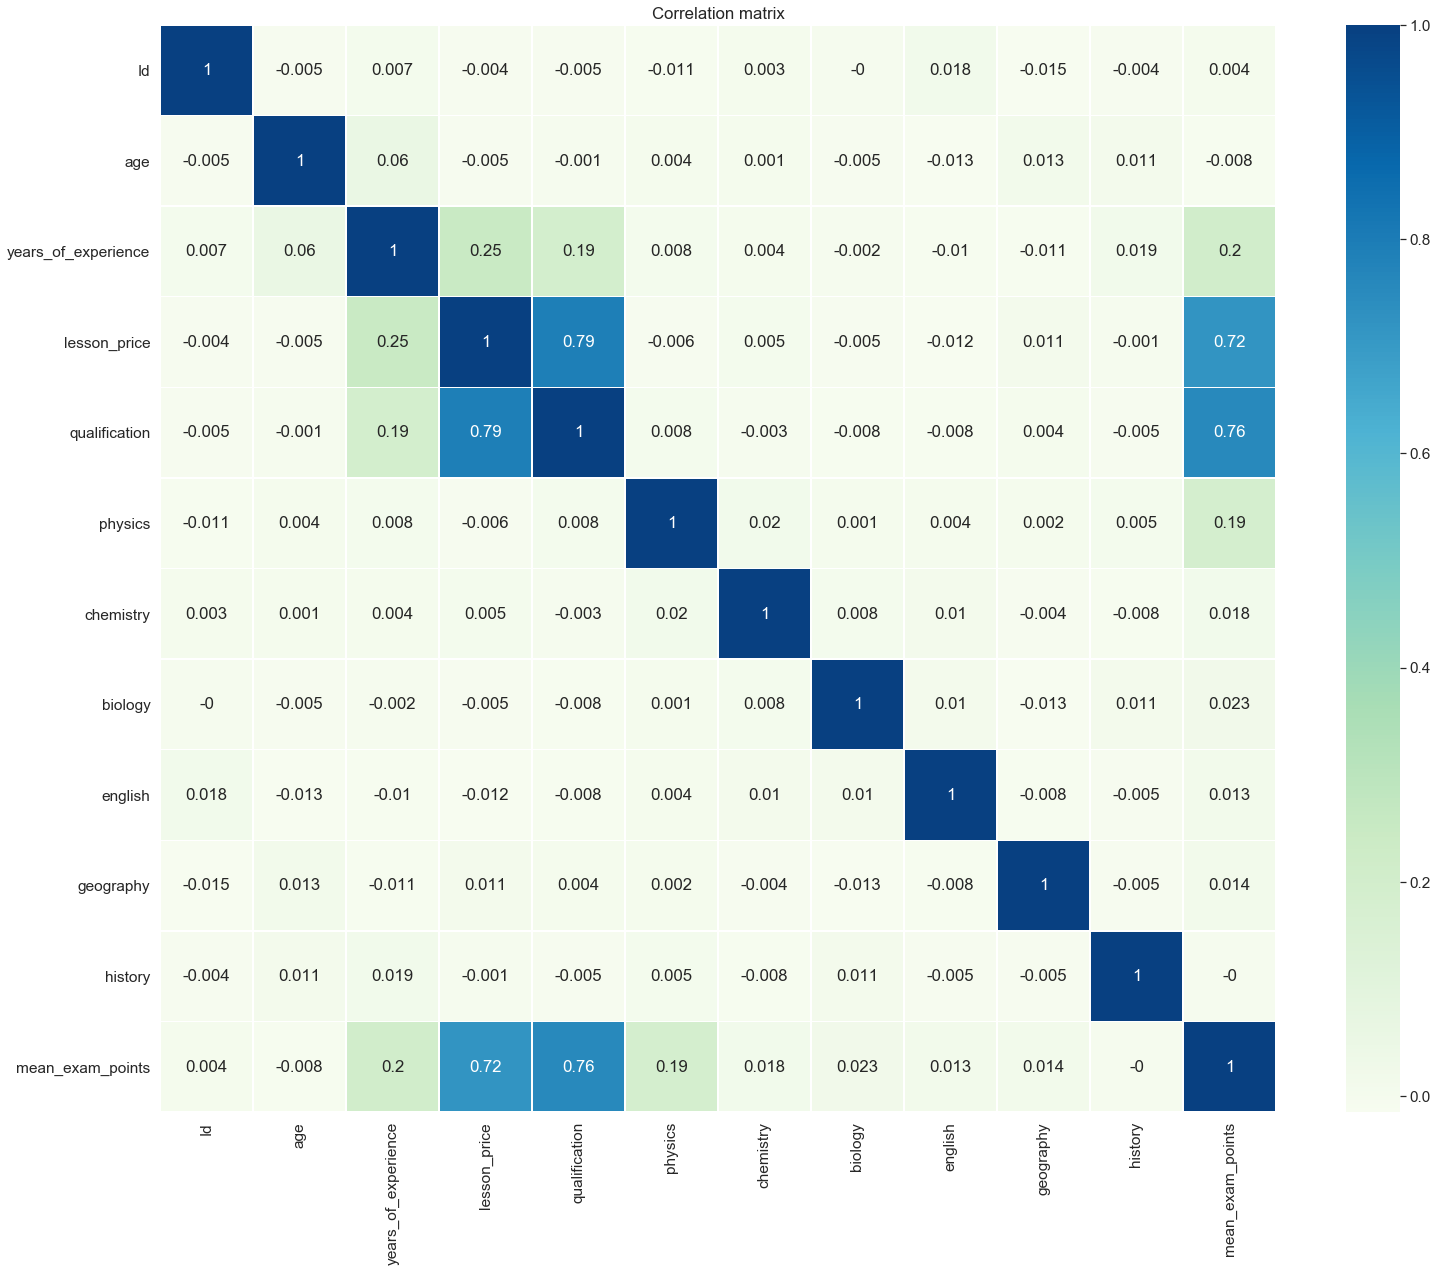

In [183]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(X[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [184]:
class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [185]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        #  найдем значение как среднее по выборке   
        prediction = np.mean(self.labels)
        return prediction

In [186]:
class Tree:

    def __init__(self, max_depth=50):
        self.max_depth = max_depth
        self.tree = None

    # Расчёт дисперсии значений
    def dispersion(self, labels):
        return np.std(labels)

    # Расчет качества

    def quality(self, left_labels, right_labels, current_dispersion):

        # доля выбоки, ушедшая в левое поддерево
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])

        return current_dispersion - p * self.dispersion(left_labels) - (1 - p) * self.dispersion(right_labels)

    # Разбиение датасета в узле

       
    def split(self, data, labels, index, t):
    
        left = np.where(data[:, index] <= t)
        right = np.where(data[:, index] > t)

        true_data = data[left]
        false_data = data[right]
        true_labels = labels[left]
        false_labels = labels[right]

        return true_data, false_data, true_labels, false_labels

        # Нахождение наилучшего разбиения

    def find_best_split(self, data, labels):
    
        #  обозначим минимальное количество объектов в узле
        min_leaf = 5

        current_dispersion = self.dispersion(labels)

        best_quality = 0
        best_t = None
        best_index = None

        n_features = data.shape[1]
    
        for index in range(n_features):
            # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique([row[index] for row in data])

            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)
                #  пропускаем разбиения, в которых в узле остается менее 5 объектов
                if len(true_data) < min_leaf or len(false_data) < min_leaf:
                    continue

                current_quality = self.quality(true_labels, false_labels, current_dispersion)

                #  выбираем порог, на котором получается максимальный прирост качества
                if current_quality > best_quality:
                    best_quality, best_t, best_index = current_quality, t, index

        return best_quality, best_t, best_index

    # Построение дерева с помощью рекурсивной функции

    def build_tree(self, data, labels, tree_depth, max_depth):

        quality, t, index = self.find_best_split(data, labels)

        #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
        if quality == 0:
            return Leaf(data, labels)

        # Базовый случай (2) - прекращаем рекурсию, когда достигнута максимальная глубина дерева
        if tree_depth >= max_depth:
            return Leaf(data, labels)

        # Увеличиваем глубину дерева на 1
        tree_depth += 1

        true_data, false_data, true_labels, false_labels = self.split(data, labels, index, t)

        # Рекурсивно строим два поддерева
        true_branch = self.build_tree(true_data, true_labels, tree_depth, max_depth)
        false_branch = self.build_tree(false_data, false_labels, tree_depth, max_depth)

        # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
        return Node(index, t, true_branch, false_branch)

    def predict_object(self, obj, node):

        #  Останавливаем рекурсию, если достигли листа
        if isinstance(node, Leaf):
            answer = node.prediction
            return answer

        if obj[node.index] <= node.t:
            return self.predict_object(obj, node.true_branch)
        else:
            return self.predict_object(obj, node.false_branch)

    def predict(self, data):
    
        val = []
        for obj in data:
            prediction = self.predict_object(obj, self.tree)
            val.append(prediction)
        return val

    def fit(self, data, labels):
        self.tree = self.build_tree(data, labels, 0, self.max_depth)
        return self

In [187]:
class GradientBoosting:
  
    def __init__(self, n_trees, max_depth, coefs, eta):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.coefs = coefs
        self.eta = eta
        self.trees = []

    def bias(self, y, z):
        return (y - z)

    def fit(self, X_train, y_train):
    
        # Деревья будем записывать в список
        trees = []

        for i in range(self.n_trees):
            tree = Tree(max_depth=self.max_depth)

            # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
            # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
            if len(self.trees) == 0:
                # обучаем первое дерево на обучающей выборке
                tree.fit(X_train, y_train)
            else:
                # Получим ответы на текущей композиции
                target = self.predict(X_train)

                # алгоритмы начиная со второго обучаем на сдвиг
                bias = self.bias(y_train, target)
                tree.fit(X_train, bias)

            self.trees.append(tree)

        return self

    def predict(self, X):
        # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
        # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
        return np.array([sum([self.eta* coef * alg.predict([x])[0] for alg, coef in zip(self.trees, self.coefs)]) for x in X])

In [203]:
class FeatureImputer:
    """Заполнение пропусков и обработка выбросов"""
    
    def __init__(self):
        self.medians=None
        
    def fit(self, X):
        self.medians = X.median()
        
    def transform(self, X):
        med_price = X[['qualification','lesson_price', 'years_of_experience']].copy()
        med_price = med_price.groupby('qualification').median()
        X['Median_Price'] = 0
        X.loc[X['qualification'] == 1, 'Median_Price'] = med_price.loc[1]['lesson_price']
        X.loc[X['qualification'] == 2, 'Median_Price'] = med_price.loc[2]['lesson_price']
        X.loc[X['qualification'] == 3, 'Median_Price'] = med_price.loc[3]['lesson_price']
        X.loc[X['qualification'] == 4, 'Median_Price'] = med_price.loc[4]['lesson_price']
        
        X['Median_years'] = 0
        X.loc[X['qualification'] == 1, 'Median_years'] = med_price.loc[1]['years_of_experience']
        X.loc[X['qualification'] == 2, 'Median_years'] = med_price.loc[2]['years_of_experience']
        X.loc[X['qualification'] == 3, 'Median_years'] = med_price.loc[3]['years_of_experience']
        X.loc[X['qualification'] == 4, 'Median_years'] = med_price.loc[4]['years_of_experience']
        
        med_lesson = X[['lesson_price', 'years_of_experience']].copy()
        med_lesson = med_lesson.groupby('years_of_experience').median()
        X['Median_lesson_years'] = 0
        X.loc[X['years_of_experience'] == 0, 'Median_lesson_years'] = med_lesson.loc[0]['lesson_price']
        X.loc[X['years_of_experience'] == 1, 'Median_lesson_years'] = med_lesson.loc[1]['lesson_price']
        X.loc[X['years_of_experience'] == 2, 'Median_lesson_years'] = med_lesson.loc[2]['lesson_price']
        X.loc[X['years_of_experience'] == 3, 'Median_lesson_years'] = med_lesson.loc[3]['lesson_price']
        X.loc[X['years_of_experience'] == 4, 'Median_lesson_years'] = med_lesson.loc[4]['lesson_price']
        X.loc[X['years_of_experience'] == 5, 'Median_lesson_years'] = med_lesson.loc[5]['lesson_price']
        X.loc[X['years_of_experience'] == 6, 'Median_lesson_years'] = med_lesson.loc[6]['lesson_price']
        X.loc[X['years_of_experience'] == 7, 'Median_lesson_years'] = med_lesson.loc[7]['lesson_price']
        X.loc[X['years_of_experience'] == 8, 'Median_lesson_years'] = med_lesson.loc[8]['lesson_price']
        X.loc[X['years_of_experience'] == 9, 'Median_lesson_years'] = med_lesson.loc[9]['lesson_price']
        X.loc[X['years_of_experience'] == 10, 'Median_lesson_years'] = med_lesson.loc[10]['lesson_price']
        
        
        return X
#         X.loc[X['qualification'] == 1, 'Median_Price'] = self.medians['lesson_price']


In [189]:
def r_2(y_pred, y_true):
    numerator = ((y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
    denominator = ((y_true - np.average(y_true)) ** 2).sum(axis=0,
                                                              dtype=np.float64)
    return 1 - (numerator / denominator)

In [204]:
imputer = FeatureImputer()

# X = imputer.transform_year(df_train)
# imputer.fit(X) # расчет медиан

X = imputer.transform(X)

In [205]:
TARGET_NAME = 'mean_exam_points'
FEATURE_NAMES = [ 'years_of_experience', 'lesson_price', 'qualification',
       'physics',  'biology', 'Median_Price', 'Median_years', 'Median_lesson_years']

In [206]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  Median_Price         10000 non-null  float64
 13  Median_years         10000 non-null  float64
 14  Median_lesson_years  10000 non-null  float64
dtypes: float64(14), int64(1)
memory usage

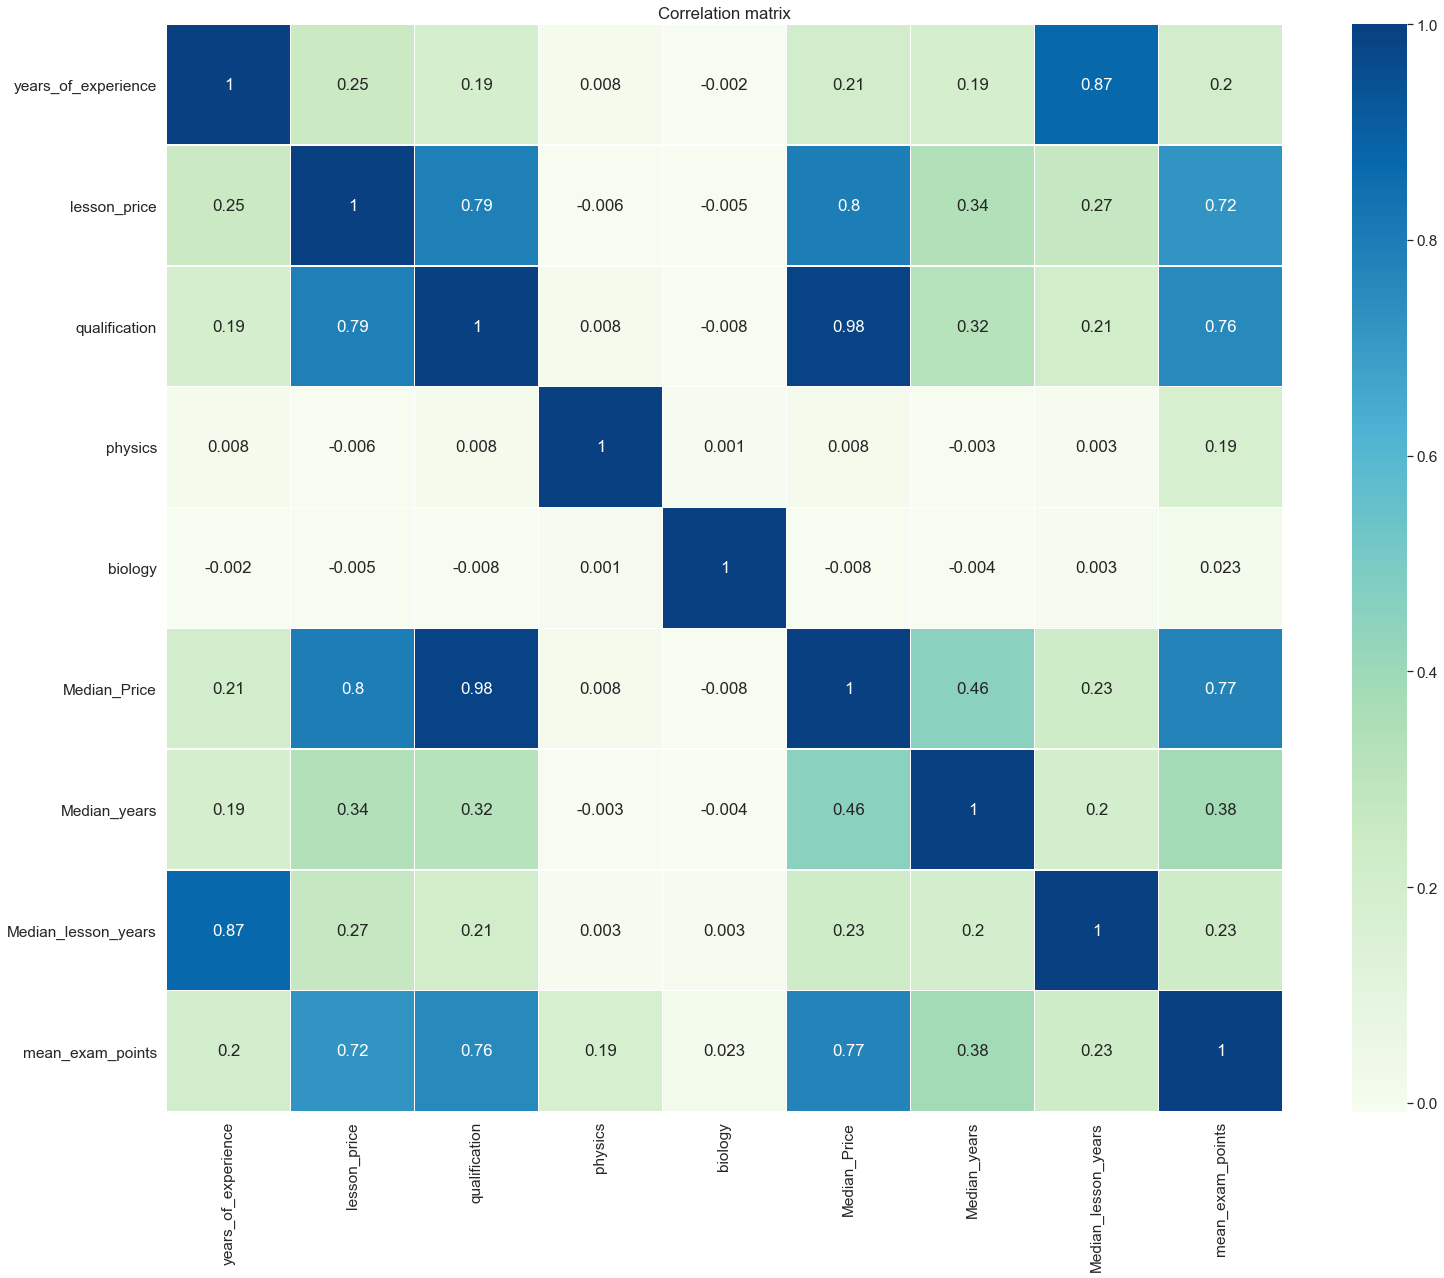

In [207]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(X[FEATURE_NAMES + [TARGET_NAME]].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [208]:
X_t = X[FEATURE_NAMES].values
y_t = X[TARGET_NAME].values

print(X_t.shape, y_t.shape)

(10000, 8) (10000,)


In [209]:
train_data, test_data, train_labels, test_labels = train_test_split(X_t, y_t, 
                                                                    test_size = 0.3,
                                                                    random_state = 1)

In [210]:
# Максимальная глубина деревьев
max_depth = 5

# Шаг
eta = 1

n_trees = 20
coefs = [1] * n_trees

In [211]:
gb = GradientBoosting(n_trees, max_depth, coefs, eta)
gb.fit(train_data, train_labels)
train_answers = gb.predict(train_data)
test_answers = gb.predict(test_data)


In [212]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')

    plt.plot(n_trees, train_err, label='train error')
    plt.plot(n_trees, test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

In [213]:
r_2(test_answers, test_labels)

0.7712771682911022

In [214]:
r_2(train_answers, train_labels)

0.7918531637364625

In [215]:
imputer = FeatureImputer()

# X = imputer.transform_year(df_train)
imputer.fit(X_final) # расчет медиан

X_final = imputer.transform(X_final)

In [216]:
gb_final = GradientBoosting(n_trees, max_depth, coefs, eta)
gb_final.fit(X_t, y_t)

In [217]:
X_test = X_final[FEATURE_NAMES].values

In [218]:
test_pred = gb_final.predict(X_test)

In [219]:
submissions = pd.concat([X_final['Id'], pd.Series(test_pred)], axis=1)
submissions = submissions.rename(columns={0: 'mean_exam_points'})

In [ ]:
submissions.to_csv('RImanov_predictions_5.csv',index=None)